In [ ]:
import requests
import pandas as pd

# Base URL for HeadHunter's API
url = 'https://api.hh.ru/vacancies'

# Parameters for the API request
params = {
    'text': 'data science OR software',  # Search for jobs containing 'data science' or 'software'
    'per_page': 100,  # Number of results per page
    'page': 0         # Starting page
}

# List to store job data
jobs = []

while True:
    # Send GET request to the API
    response = requests.get(url, params=params)
    data = response.json()
    
    # Extract job items from the response
    for vacancy in data.get('items', []):
        job_info = {
            'Title': vacancy.get('name'),
            'Employer': vacancy.get('employer', {}).get('name'),
            'Location': vacancy.get('area', {}).get('name'),
            'Published At': vacancy.get('published_at'),
            'URL': vacancy.get('alternate_url'),
            'Description': vacancy.get('snippet', {}).get('responsibility'),
            'Requirements': vacancy.get('snippet', {}).get('requirement')
        }
        jobs.append(job_info)
    
    # Check if there are more pages
    if data.get('pages', 0) > params['page'] + 1:
        params['page'] += 1
    else:
        break

# Create a DataFrame from the job data
df = pd.DataFrame(jobs)

# Save the DataFrame to a CSV file
df.to_csv('headhunter_jobs.csv', index=False)

print("CSV file 'headhunter_jobs.csv' has been created successfully.")


In [36]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('headhunter_jobs.csv')

# Display the first few rows to understand the structure
df.head()


,Title,Employer,Location,Published At,URL,Description,Requirements
0,Frontend-разработчик,MAX WEB MEDIA,Ташкент,2025-03-11T09:57:35+0300,https://hh.ru/vacancy/118174106,Разработка пользовательских интерфейсов – Созд...,Знание HTML и CSS – Умение верстать адаптивные...
1,Frontend-разработчик,SMART-BASE,Ташкент,2025-03-12T08:49:15+0300,https://hh.ru/vacancy/118222955,Разработка ПО с использованием языка программи...,Владения Git и командной строки. — Понимание п...
2,Junior Frontend-разработчик,SIRIUS LTW,Алматы,2025-03-13T12:38:18+0300,https://hh.ru/vacancy/118294092,Разработка новых и поддержка существующих веб-...,Базовые знания JavaScript и TypeScript. Понима...
3,Бухгалтер,IMEX GROUP,Астана,2025-03-17T09:05:15+0300,https://hh.ru/vacancy/118413208,Ведет складской учет ТМЦ на существующих склад...,Техническое-профессиональное или высшее образо...
4,Тестировщик ПО/QA,ЦТФ,Петрозаводск,2025-03-17T13:01:48+0300,https://hh.ru/vacancy/118440719,Выполнение ручного функционального тестировани...,"Знание теории тестирования, видов тестирования..."


In [37]:
df= df.iloc[:500]

In [39]:
# import pandas as pd
# from googletrans import Translator
# from tqdm import tqdm

# # Initialize the translator
# translator = Translator()

# # Initialize a progress bar
# tqdm.pandas()

# # Translate each column that needs translation
# for column in df.columns:
#     if df[column].dtype == 'object':  # Check if column contains text data
#         # Translate each row in the column and show progress
#         df[column] = df[column].progress_apply(lambda x: translator.translate(x, src='ru', dest='en').text if x else x)

# # Save the translated DataFrame to a new CSV
# df.to_csv('output_english.csv', index=False)

# print("Translation completed and saved to 'output_english.csv'")


In [ ]:
# Basic info about the DataFrame
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of job titles (Top 10)
title_counts = df['Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


In [ ]:
# Plot the top 10 locations for job postings
location_counts = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='Blues')
plt.title('Top 10 Job Locations')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.show()


C:\Users\Yazan\AppData\Local\Temp\ipykernel_16028\365732828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employer_counts.values, y=employer_counts.index, palette='viridis')


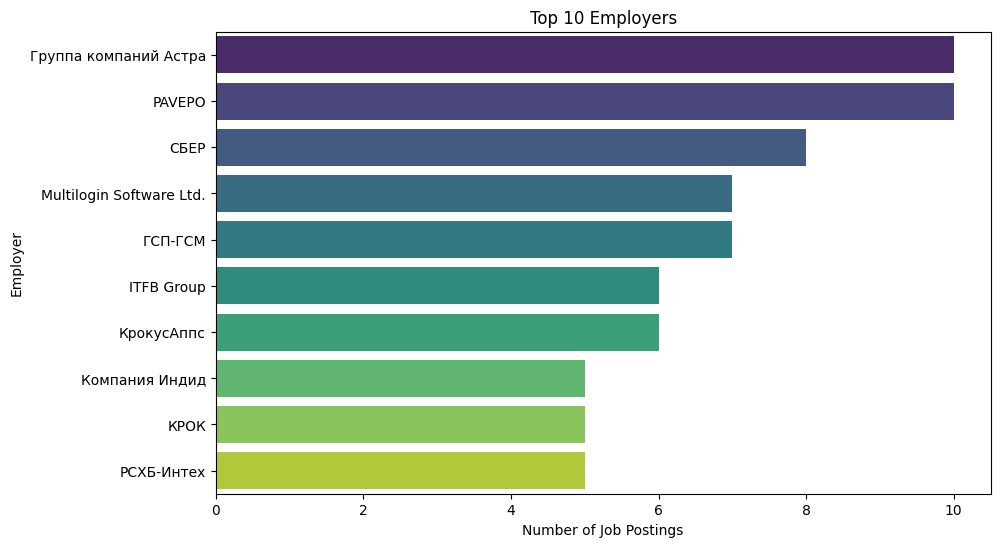

In [10]:
# Plot the top 10 employers by job count
employer_counts = df['Employer'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=employer_counts.values, y=employer_counts.index, palette='viridis')
plt.title('Top 10 Employers')
plt.xlabel('Number of Job Postings')
plt.ylabel('Employer')
plt.show()


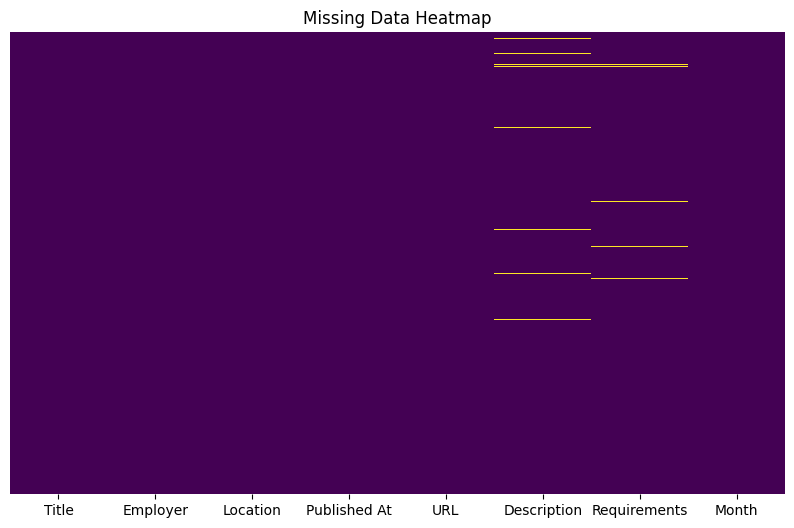

In [11]:
import seaborn as sns

# Visualizing missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()


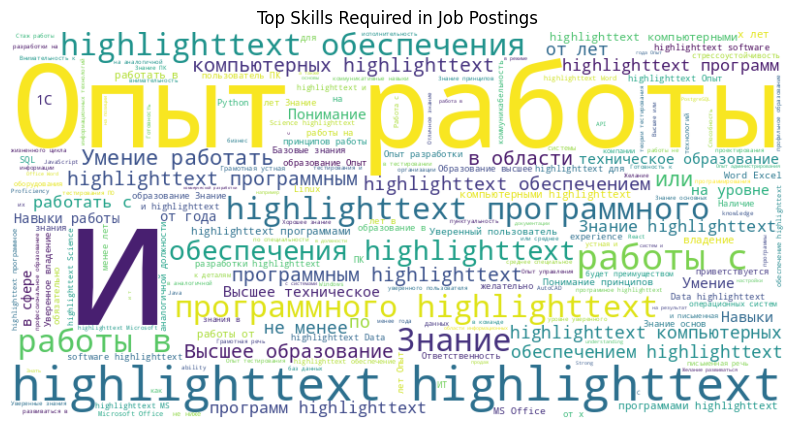

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the skills/requirements into a single string
requirements = df['Requirements'].dropna().str.cat(sep=' ')

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(requirements)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Skills Required in Job Postings')
plt.show()
